In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("south_sulawesi_flood_data (1).csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Columns: 107 entries, id to DT_RowIndex
dtypes: float64(83), int64(14), object(10)
memory usage: 658.0+ KB


In [4]:
#Menghapus kolom tidak relevan
drop_initial = ['jenis', 'DT_RowIndex', 'deleted_at', 'deleted_by', 'created_at', 'created_by']
df.drop(columns=drop_initial, inplace=True, errors='ignore')

*   Dilakukan pembuangan awal kolom yang dianggap tidak memberikan nilai analisis atau sudah dipastikan kosong seluruhnya (100% missing value).
*   Kolom seperti deleted_at dan deleted_by adalah bagian dari sistem atau metadata yang tidak dibutuhkan untuk analisis prediktif.
*   DT_RowIndex dan jenis kemungkinan berasal dari proses input atau frontend dan tidak informatif secara statistik.
*   Penggunaan errors='ignore' mencegah error jika ada kolom yang ternyata tidak ditemukan, sehingga kode tetap berjalan.




In [5]:
# Cek persentase missing value
missing_percent = df.isnull().sum() / len(df) * 100

# Tampilkan kolom dengan missing <5 %
high_missing = missing_percent[missing_percent < 5]
print("Kolom dengan missing value ,<5%:\n", high_missing)

Kolom dengan missing value ,<5%:
 id           0.000000
tanggal      0.000000
kab          0.000000
kec          0.762389
kel          3.557814
kk           0.000000
jiwa         0.127065
meninggal    0.000000
hilang       0.000000
luka         0.000000
ungsi        0.000000
ternak       0.000000
rb           0.254130
rs           0.000000
rr           0.127065
tmdm         0.000000
jln          0.000000
swh          0.000000
kebun        0.127065
hutan        0.000000
tmbk         0.000000
kerugian     0.127065
lat          0.000000
lng          0.000000
dtype: float64


*   Langkah ini dilakukan untuk menghitung presentase missing value per kolom
*   Hanya kolom - kolom dengan missing value kurang dari 5% yang difilter, karena masih bisa dipertahankan dan diperbaiki nilainya tanpa membuang banyak informasi
*   Missing value dibawah 5% terdapat pada kolom kerugian, kec, kel, rb, rr, kebun dan jiwa.
*   Hasil dari langkah ini dijadikan dasar untuk pengisian nilai pada tahap selanjutnya. Namun, perlu dilakukan cek distribusi data untuk menentukan pengisian nilai menggunakan metode apa (median, mean, dan modus)





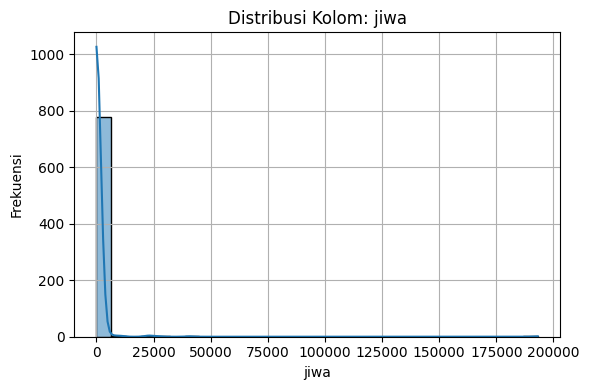

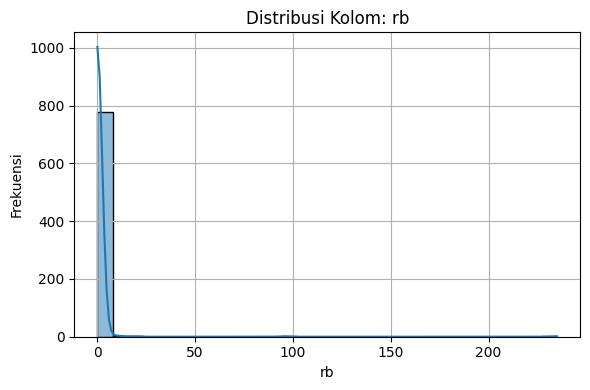

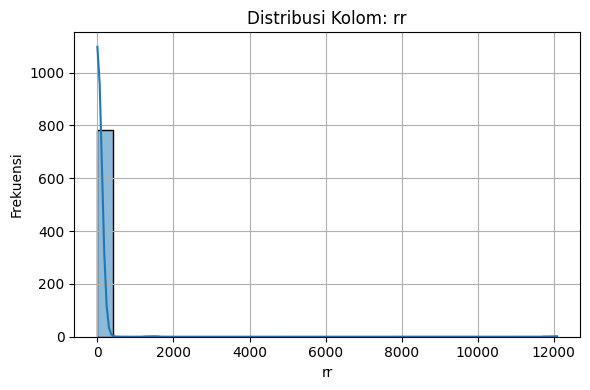

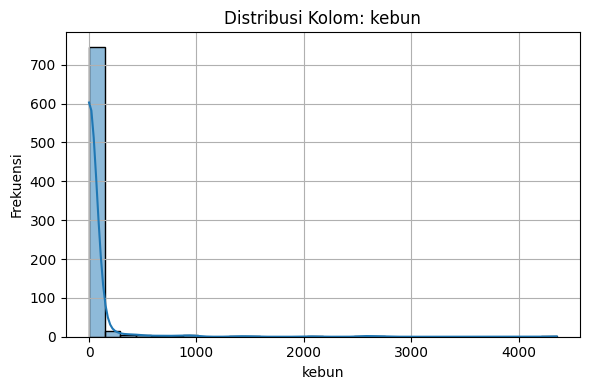

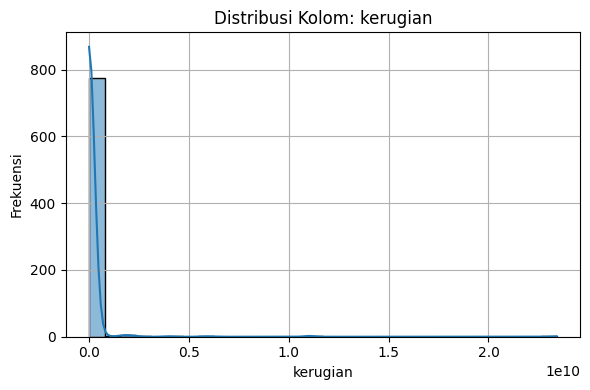

In [6]:
#Cek Distribusi fitur dengan missing value < 5%
cols_to_check = ['kec', 'kel', 'jiwa', 'rb', 'rr', 'kebun', 'kerugian']

# Cek distribusi fitur numerik (exclude object/text)
numeric_cols = df[cols_to_check].select_dtypes(include=['float64', 'int64']).columns

# Plot distribusi
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi Kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
# Median untuk distribusi skewed
median_cols = ['jiwa', 'rb', 'rr', 'kebun', 'kerugian']
for col in median_cols:
    df[col] = df[col].fillna(df[col].median())

# Mode untuk kolom kategorikal
mode_cols = ['kec', 'kel']
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

*   Nilai kosong (NaN) pada kolom ini berdasarkan nilai median karena distribusi data cenderung skewed (tidak normal), terlihat dari histogram yang sebelumnya divisualisasikan.
*   Kenapa Median? karena median lebih robust terhadap outlier, cocok untuk data distribusi miring
*   Pengisian nilai median dilakukan pada kolom jiwa, rb, rr, kebun dan kerugian.
*   Kolom kec dan kel adalah data kategorikal yang bersifat nominal (tidak berurutan).
*   Pengisian nilai pada kolom kec dan kel dilakukan menggunakan nilai modus, yaitu nilai yang paling sering muncul pada kolom tersebut.
*   Modus cocok untuk data kategorikal karena bisa dihitung rata-ratanya.
*   Mengisi dengan nilai yang paling umum cenderung tidak mengganggu pola distribusi keseluruhan data





In [8]:
#Menampilkan semua baris
pd.set_option('display.max_rows', None)
# Cek persentase missing value
missing_percent = df.isnull().sum() / len(df) * 100

# Tampilkan kolom dengan missing > 5%
high_missing = missing_percent[missing_percent > 5]
print("Kolom dengan missing value > 5%:\n", high_missing)

Kolom dengan missing value > 5%:
 sklh                     58.958069
ibdh                     58.958069
sarkes                   58.958069
ktr                      58.958069
kios                     58.958069
jmbtn                    59.085133
penyebab                 12.071156
kronologi                12.579416
updated_at               69.377382
updated_by               69.377382
terdampak                41.168996
tertimbun                41.041931
pabrik                  100.000000
tmdm_fu                  41.168996
tertimbun_fu             41.041931
keterangan              100.000000
ket_penanganan           98.602287
status                   15.120712
anak_anak                98.475222
perempuan                98.475222
laki_laki                98.475222
lansia                   98.475222
tertimbun_pendidikan     41.041931
terendam_pendidikan      41.041931
rr_pendidikan            41.041931
rs_pendidikan            41.041931
rb_pendidikan            41.041931
tertimbun_kesehatan  

*   Tujuan langkah ini adalah mengidentifikasi fitur mana aja yang memiliki tingkat missing value cukup tinggi, sehingga diperlukan penanganan khusus
*   Umumnya, jika missing value >50% dipertimbangkan untuk dihapus
*   Jika di antara 5-50% perlu dipertimbangkan apakah fitur penting dan bisa diisi secara logis.


In [9]:
# Menghapus kolom nilai missing value >95%
drop_cols = [
    'deleted_at', 'deleted_by', 'pabrik', 'keterangan', 'ket_penanganan',
    'anak_anak', 'perempuan', 'laki_laki', 'lansia'
]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

*   Kolom - kolom tersebut tidak memiliki informasi (semuanya kosong) sehingga tidak berguna dalam analisis atau prediksi
*   Tetap menyimpan kolom seperti ini hanya menambah noise dan beban memori



In [10]:
median_cols = [
    'terdampak', 'tertimbun', 'tmdm_fu', 'tertimbun_fu',
    'tertimbun_pendidikan', 'terendam_pendidikan', 'rr_pendidikan', 'rs_pendidikan', 'rb_pendidikan',
    'tertimbun_kesehatan', 'terendam_kesehatan', 'rr_kesehatan', 'rs_kesehatan', 'rb_kesehatan',
    'tertimbun_kantor', 'terendam_kantor', 'rr_kantor', 'rs_kantor', 'rb_kantor',
    'tertimbun_ibadah', 'terendam_ibadah', 'rr_ibadah', 'rs_ibadah', 'rb_ibadah',
    'rr_fu', 'rs_fu', 'rb_fu',
    'tertimbun_jembatan', 'terendam_jembatan', 'rr_jembatan', 'rs_jembatan', 'rb_jembatan',
    'tertimbun_pabrik', 'terendam_pabrik', 'rr_pabrik', 'rs_pabrik', 'rb_pabrik',
    'tertimbun_toko', 'terendam_toko', 'rr_toko', 'rs_toko', 'rb_toko',
    'lahan', 'irigasi', 'tertimbun_tanggul', 'terendam_tanggul',
    'rr_tanggul', 'rs_tanggul', 'rb_tanggul',
    'meninggal_laki', 'meninggal_perempuan', 'hilang_laki', 'hilang_perempuan',
    'luka_laki', 'luka_perempuan', 'mengungsi_laki', 'mengungsi_perempuan'
]
for col in median_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


In [11]:
mode_cols = ['penyebab', 'kronologi', 'status', 'kategori_laki', 'kategori_perempuan']
for col in mode_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])


*   Fitur numerik diisi dengan median karena distribusi cenderung skewed.
*   Fitur kategorikal atau teks seperti penyebab dan kronologi, isi dengan string default agar tidak hilang tetapi tetap mencerminkan bahwa datanya tidak lengkap.



In [12]:
# Hapus metadata teknis
df.drop(columns=['updated_at', 'updated_by'], inplace=True, errors='ignore')

# Imputasi kolom fasilitas terdampak
fasilitas_cols = ['sklh', 'ibdh', 'sarkes', 'ktr', 'kios', 'jmbtn']
for col in fasilitas_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


*   Kolom metadata teknis perlu dihapus karena kolom ini tidak diperlukan untuk analisis danhanya menyimpan informasi log system



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 92 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    787 non-null    int64  
 1   tanggal               787 non-null    object 
 2   kab                   787 non-null    object 
 3   kec                   787 non-null    object 
 4   kel                   787 non-null    object 
 5   kk                    787 non-null    int64  
 6   jiwa                  787 non-null    float64
 7   meninggal             787 non-null    int64  
 8   hilang                787 non-null    int64  
 9   luka                  787 non-null    int64  
 10  ungsi                 787 non-null    int64  
 11  ternak                787 non-null    int64  
 12  rb                    787 non-null    float64
 13  rs                    787 non-null    int64  
 14  rr                    787 non-null    float64
 15  tmdm                  7

In [14]:
df.head(10)

,id,tanggal,kab,kec,kel,kk,jiwa,meninggal,hilang,luka,...,meninggal_laki,meninggal_perempuan,hilang_laki,hilang_perempuan,luka_laki,luka_perempuan,mengungsi_laki,mengungsi_perempuan,kategori_laki,kategori_perempuan
0,3309,03 Maret 2015,Kab. Pangkajene Kepulauan,Pangkajene,Anrong Appaka,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3248,21 Desember 2017,Kab. Pangkajene Kepulauan,Pangkajene,Anrong Appaka,250,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3247,21 Desember 2017,Kab. Pangkajene Kepulauan,Pangkajene,Tekolabbua,300,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3246,21 Desember 2017,Kab. Pangkajene Kepulauan,Pangkajene,Mappa Saile,300,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3244,21 Desember 2017,Kab. Pangkajene Kepulauan,Bungoro,Boriappaka,100,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3243,21 Desember 2017,Kab. Pangkajene Kepulauan,Minasa Tene,Bonto Langkasa,150,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3241,21 Desember 2017,Kab. Pangkajene Kepulauan,Pangkajene,Padoang Doangan,85,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3253,16 Januari 2018,Kab. Pangkajene Kepulauan,Labakkang,Borimasunggu,30,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3642,22 Januari 2019,Kab. Pangkajene Kepulauan,Mandalle,Benteng,79,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3641,22 Januari 2019,Kab. Pangkajene Kepulauan,Mandalle,Coppo Tompong,57,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Simpan Dataset
df.to_csv("Clean Data of Si Andalan.csv", index=False)

print("Cleaning selesai. Dataset siap digunakan.")

Cleaning selesai. Dataset siap digunakan.
